In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ls

happydata.csv  Untitled.ipynb


In [3]:
df = pd.read_csv("happydata.csv")
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [4]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [14]:
print(f"There are {df["happy"].value_counts()[0]} of class 0 and {df["happy"].value_counts()[1]} of class 1")

There are 66 of class 0 and 77 of class 1


In [20]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
infoavail,1.000000,0.092676,0.301971,0.104378,0.399203,0.417521,0.312740
housecost,0.092676,1.000000,0.181081,0.107432,-0.002141,0.024546,0.019368
schoolquality,0.301971,0.181081,1.000000,0.298898,0.329874,0.207006,0.163639
policetrust,0.104378,0.107432,0.298898,1.000000,0.269420,0.199151,0.113356
streetquality,0.399203,-0.002141,0.329874,0.269420,1.000000,0.307402,0.206685
ëvents,0.417521,0.024546,0.207006,0.199151,0.307402,1.000000,0.220729
happy,0.312740,0.019368,0.163639,0.113356,0.206685,0.220729,1.000000


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

knn = KNeighborsClassifier()
svm = LinearSVC()

In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

labels = df.iloc[:, -1]
values = df.iloc[:, :-1]
#scaler = MinMaxScaler()
scaler = StandardScaler()
df_scaled = pd.DataFrame(data = scaler.fit_transform(values), columns = values.columns)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(values, labels, test_size = 0.3)

In [63]:
print(f"We have {X_train.shape[0]} train data and {X_test.shape[0]} test data")

We have 100 train data and 43 test data


In [64]:
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)

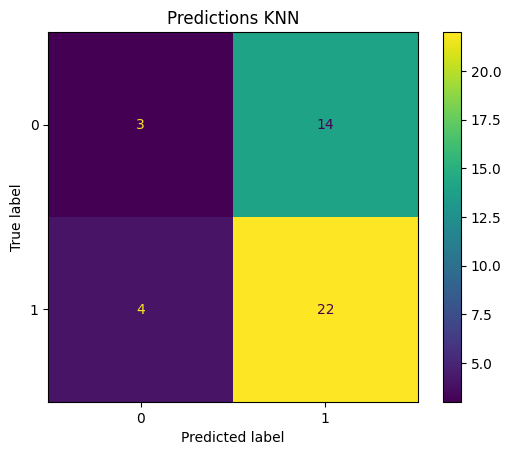

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm1)
disp.plot()
plt.title("Predictions KNN")
plt.show()

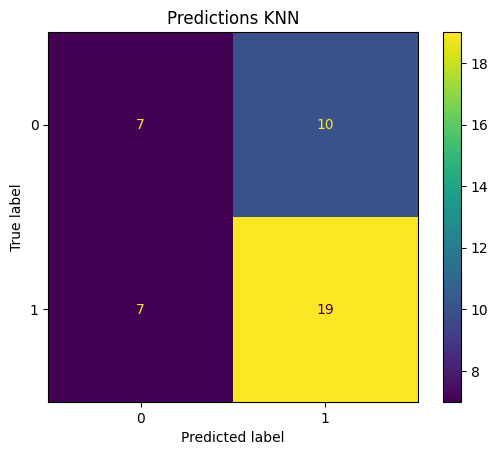

In [66]:
cm2 = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm2)
disp.plot()
plt.title("Predictions KNN")
plt.show()

### Testing the parameters in a grid :

In [67]:
from sklearn.model_selection import GridSearchCV

k_val = [k for k in range(1, 51)]
parameters = {"n_neighbors" : k_val}
GS = GridSearchCV(knn, param_grid = parameters, cv = 10)
GS.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [68]:
print(f"The best accuracy was {GS.best_score_} with the parameters {GS.best_params_}")

The best accuracy was 0.63 with the parameters {'n_neighbors': 21}


In [69]:
type(GS.cv_results_)

dict

In [70]:
df_result = pd.DataFrame(data = GS.cv_results_)
df_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001816,0.000529,0.002891,0.000548,1,{'n_neighbors': 1},0.5,0.3,0.5,0.5,0.5,0.6,0.5,0.6,0.5,0.4,0.49,0.083066,46
1,0.001097,0.000262,0.001920,0.000523,2,{'n_neighbors': 2},0.6,0.3,0.6,0.3,0.4,0.6,0.6,0.6,0.5,0.4,0.49,0.122066,46
2,0.001075,0.000214,0.001763,0.000346,3,{'n_neighbors': 3},0.6,0.4,0.7,0.5,0.3,0.5,0.7,0.6,0.3,0.5,0.51,0.137477,43
3,0.000906,0.000030,0.001586,0.000076,4,{'n_neighbors': 4},0.3,0.5,0.5,0.3,0.4,0.7,0.7,0.5,0.5,0.5,0.49,0.130000,46
4,0.000877,0.000005,0.001526,0.000039,5,{'n_neighbors': 5},0.4,0.5,0.6,0.3,0.3,0.6,0.6,0.6,0.5,0.3,0.47,0.126886,50


In [71]:
df_result["mean_test_score"]

0     0.49
1     0.49
2     0.51
3     0.49
4     0.47
5     0.52
6     0.53
7     0.51
8     0.55
9     0.50
10    0.53
11    0.53
12    0.54
13    0.49
14    0.56
15    0.56
16    0.58
17    0.61
18    0.60
19    0.57
20    0.63
21    0.58
22    0.60
23    0.62
24    0.61
25    0.57
26    0.58
27    0.57
28    0.58
29    0.57
30    0.58
31    0.59
32    0.58
33    0.62
34    0.58
35    0.58
36    0.62
37    0.57
38    0.54
39    0.56
40    0.56
41    0.52
42    0.56
43    0.56
44    0.56
45    0.56
46    0.52
47    0.53
48    0.54
49    0.53
Name: mean_test_score, dtype: float64

Text(0, 0.5, 'Acc values')

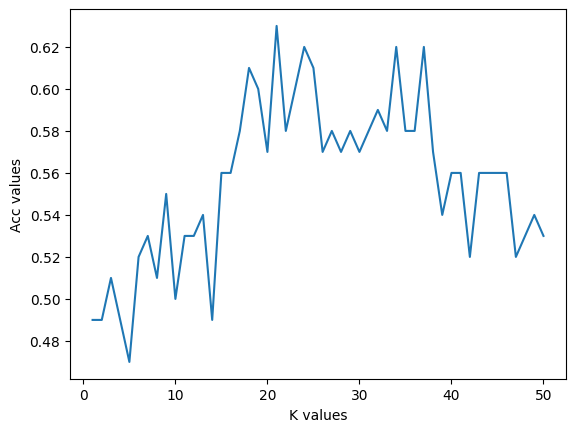

In [72]:
plt.plot(k_val, df_result["mean_test_score"])
plt.xlabel("K values")
plt.ylabel("Acc values")